<a href="https://colab.research.google.com/github/minghsu0107/ML/blob/master/MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [70]:
print(train_images.shape)
print(train_labels.shape)
print(len(train_labels))
print(train_labels)
print(len(test_labels))

(60000, 28, 28)
(60000,)
60000
[5 0 4 ... 5 6 8]
10000


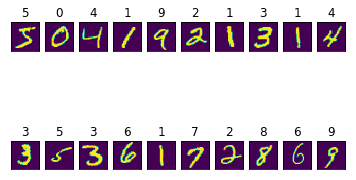

In [71]:
def imshow(img):
    plt.imshow(img)
    
# 拿前20張出來看看
images, labels = train_images[:20], train_labels[:20]
# 畫出來
fig = plt.figure()
for idx in np.arange(20):
    ax = fig.add_subplot(2, 20/2, idx+1, xticks=[], yticks=[])
    imshow(images[idx])
    ax.set_title(labels[idx])

In [0]:
from keras import models
from keras import layers

network = models.Sequential()
network.add(layers.Dense(512, activation='relu', input_shape=(28 * 28,)))
network.add(layers.Dense(10, activation='softmax'))

In [0]:
network.compile(optimizer='rmsprop',
                loss='categorical_crossentropy',
                metrics=['accuracy'])

In [0]:
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype('float32') / 255

test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype('float32') / 255

In [0]:
from keras.utils import to_categorical

original_test_labels = test_labels.copy()
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

In [76]:
network.fit(train_images, train_labels, epochs=5, batch_size=128)

Epoch 1/5
60000/60000 [==============================] - 5s 88us/step - loss: 0.2522 - acc: 0.9270
Epoch 2/5
60000/60000 [==============================] - 5s 83us/step - loss: 0.1038 - acc: 0.9691
Epoch 3/5
60000/60000 [==============================] - 5s 83us/step - loss: 0.0677 - acc: 0.9797
Epoch 4/5
60000/60000 [==============================] - 5s 84us/step - loss: 0.0485 - acc: 0.9853
Epoch 5/5
60000/60000 [==============================] - 5s 82us/step - loss: 0.0364 - acc: 0.9893


In [77]:
test_loss, test_acc = network.evaluate(test_images, test_labels)
print('test_acc:', test_acc)

10000/10000 [==============================] - 1s 50us/step
test_acc: 0.9745


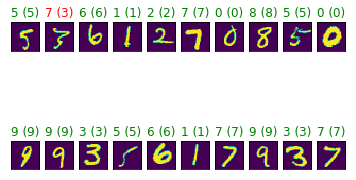

In [89]:
# 隨機取20個出來看看
idx = np.random.randint(10000, size=20)
images, labels = original_test_images[idx], original_test_labels[idx]
preds = np.argmax(network.predict(test_images[idx]), axis=1)
fig = plt.figure()
for idx in np.arange(20):
    ax = fig.add_subplot(2, 20/2, idx+1, xticks=[], yticks=[])
    imshow(images[idx])
    ax.set_title("{} ({})".format(preds[idx], labels[idx]), color=("green" if preds[idx]==labels[idx] else "red"))